<a href="https://colab.research.google.com/github/bondsoncruso/Colab/blob/main/Pairs_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pairs Trading Strategy
Pairs trading is a nice example of a strategy based on mathematical analysis.

The principle is as follows: Let's say you have a pair of securities X and Y that have some underlying economic link. An example might be two companies that manufacture the same product, for example Pepsi and Coca Cola. You expect the spread (ratio or difference in prices) between these two to remain constant with time. However, from time to time, there might be a divergence in the spread between these two pairs. The divergence within a pair can be caused by temporary supply/demand changes, large buy/sell orders for one security, reaction for important news about one of the companies, and so on. When there is a temporary divergence between the two securities, i.e. one stock moves up while the other moves down, the pairs trade would be to short the outperforming stock and to long the underperforming one, betting that the "spread" between the two would eventually converge.

Pairs trading is a market neutral trading strategy enabling traders to profit from virtually any market conditions: uptrend, downtrend, or sideways movement.


In [ ]:
!pip install statsmodels
!pip install tensorboardX
!pip install pandas 
!pip install plotly
!pip install bs4 
!pip install plotly
!pip install -U auquan_toolbox
!pip install --pre --upgrade alpha_vantage

     |████████████████████████████████| 317kB 2.7MB/s 
     |████████████████████████████████| 112kB 2.8MB/s 
     |████████████████████████████████| 1.2MB 4.2MB/s 
     |████████████████████████████████| 153kB 15.4MB/s 
     |████████████████████████████████| 296kB 16.4MB/s 
  Created wheel for alpha-vantage: filename=alpha_vantage-2.2.0-cp36-none-any.whl size=25706 sha256=1ec1411cf849d59f97598bf3165dc64514669ad8d702ce9c496d1dc261310211
  Stored in directory: /root/.cache/pip/wheels/3a/fa/05/80b0afcbd2a4de8bd2a0c5cd77084e3d3a9cc12c48be9b7f84
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3161 sha256=c2665bd81e8d1d799050bb24cb04edb8e5991ef2bd608f76ec8d261017b079db
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built alpha-vantage idna-ssl


In [ ]:
import numpy as np
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import statsmodels
from statsmodels.tsa.stattools import coint
# just set the seed for the random number generator
np.random.seed(107)

import matplotlib.pyplot as plt
import time
import datetime

api_key ='OVGC8KHNZCEZ89YF'

ts = TimeSeries(key= api_key, output_format='pandas')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
todays_date = datetime.datetime.now().date()
index = pd.date_range(todays_date, periods=10, freq='D')
seed = pd.DataFrame(index=index)

In [ ]:
symbol = 'AMARAJABAT.BSE'
data = ts.get_daily(symbol=[symbol], outputsize='full')
data = data[0]
data = data.drop(['1. open','2. high','3. low','5. volume'],axis=1)
data.rename(columns = {'4. close':'AMARAJABAT'}, inplace = True)
portfolio = data.join(seed)
symbol = 'EVEREADY.BSE'
data = ts.get_daily(symbol=[symbol], outputsize='full')
data = data[0]
data = data.drop(['1. open','2. high','3. low','5. volume'],axis=1)
data.rename(columns = {'4. close':'EVEREADY'}, inplace = True)
portfolio = data.join(portfolio)
symbol = '500086.BSE'
data = ts.get_daily(symbol=[symbol], outputsize='full')
data = data[0]
data = data.drop(['1. open','2. high','3. low','5. volume'],axis=1)
data.rename(columns = {'4. close':'EXIDEIND'}, inplace = True)
portfolio = data.join(portfolio)
symbol = 'HBLPOWER.BSE'
data = ts.get_daily(symbol=[symbol], outputsize='full')
data = data[0]
data = data.drop(['1. open','2. high','3. low','5. volume'],axis=1)
data.rename(columns = {'4. close':'HBLPOWER'}, inplace = True)
portfolio = data.join(portfolio)
symbol = '504176.BSE'
data = ts.get_daily(symbol=[symbol], outputsize='full')
data = data[0]
data = data.drop(['1. open','2. high','3. low','5. volume'],axis=1)
data.rename(columns = {'4. close':'HIGHENE'}, inplace = True)
portfolio = data.join(portfolio)
time.sleep(60)
symbol = '504058.BSE'
data = ts.get_daily(symbol=[symbol], outputsize='full')
data = data[0]
data = data.drop(['1. open','2. high','3. low','5. volume'],axis=1)
data.rename(columns = {'4. close':'NIPPOBATRY'}, inplace = True)
portfolio = data.join(portfolio)
symbol = '504093.BSE'
data = ts.get_daily(symbol=[symbol], outputsize='full')
data = data[0]
data = data.drop(['1. open','2. high','3. low','5. volume'],axis=1)
data.rename(columns = {'4. close':'PANAENERG'}, inplace = True)
portfolio = data.join(portfolio)
symbol = '504180.BSE'
data = ts.get_daily(symbol=[symbol], outputsize='full')
data = data[0]
data = data.drop(['1. open','2. high','3. low','5. volume'],axis=1)
data.rename(columns = {'4. close':'STDBAT'}, inplace = True)
portfolio = data.join(portfolio)


In [ ]:
portfolio = portfolio.iloc[::-1].dropna()
portfolio

,STDBAT,PANAENERG,NIPPOBATRY,HIGHENE,HBLPOWER,EXIDEIND,EVEREADY,AMARAJABAT
date,,,,,,,,
2011-12-27,3.15,50.00,372.00,79.95,15.50,104.50,23.95,197.95
2012-01-23,3.78,56.85,389.60,81.35,16.20,127.80,28.40,203.00
2012-01-24,4.53,58.50,394.90,80.00,16.50,129.65,28.50,203.30
2012-01-25,4.98,59.70,391.05,80.25,16.26,129.00,28.60,202.90
2012-01-27,5.47,59.70,387.65,79.80,16.80,129.80,29.05,205.40
...,...,...,...,...,...,...,...,...
2020-11-02,5.56,160.65,516.00,360.00,19.40,159.30,134.15,775.10
2020-11-03,5.30,159.80,511.45,355.60,18.60,160.15,132.90,782.45
2020-11-04,5.56,160.00,529.55,356.00,18.25,162.90,133.45,789.35


In [ ]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [ ]:
instrumentIds = list(portfolio.keys())

## Cointegration

Cointegration, very loosely speaking, is a "different" form of correlation. If two series are cointegrated, the ratio between them will vary around a mean. For pairs trading to work between two timeseries, the expected value of the ratio over time must converge to the mean, i.e. they should be cointegrated.

We should see a very low p-value on cointegrated pairs.

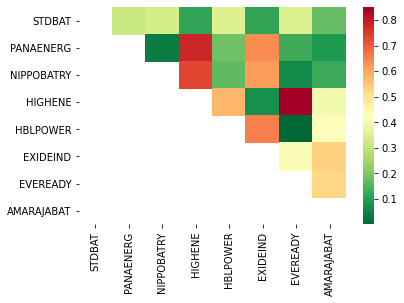

[('PANAENERG', 'NIPPOBATRY'), ('HBLPOWER', 'EVEREADY')]


In [ ]:
# Heatmap to show the p-values of the cointegration test
# between each pair of stocks

scores, pvalues, pairs = find_cointegrated_pairs(portfolio)
import seaborn
m = [0,0.2,0.4,0.6,0.8,1]
seaborn.heatmap(pvalues, xticklabels=instrumentIds, 
                yticklabels=instrumentIds, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.98)
                )
plt.show()
print(pairs)

## How to make a pairs trade?
Because two cointegrated time series (such as X and Y) drift towards and apart from each other, there will be times when the spread is high and times when the spread is low. We make a pairs trade by buying one security and selling another. This way, if both securities go down together or go up together, we neither make nor lose money — we are market neutral.

Going back to X and Y above that follow Y = ⍺ X + e, such that ratio (Y/X) moves around it’s mean value ⍺, we make money on the ratio of the two reverting to the mean. In order to do this we’ll watch for when X and Y are far apart, i.e ⍺ is too high or too low:

Going Long the Ratio This is when the ratio ⍺ is smaller than usual and we expect it to increase. For example, we place a bet on this by buying Y and selling X.
Going Short the Ratio This is when the ratio ⍺ is large and we expect it to become smaller. For example, we place a bet on this by selling Y and buying X.
Note that we always have a “hedged position”: a short position makes money if the security sold loses value, and a long position will make money if a security gains value, so we’re immune to overall market movement. We only make or lose money if securities X and Y move relative to each other.

0.03997702802291267


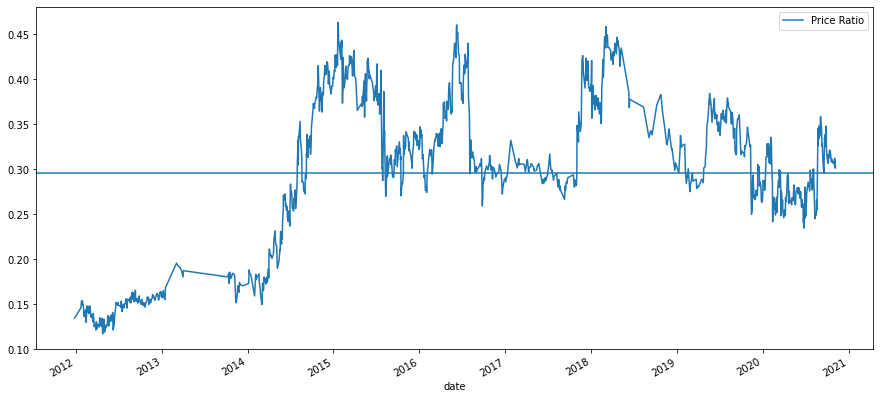

In [ ]:
Stock1 = portfolio['PANAENERG']
Stock2 = portfolio['NIPPOBATRY']
score, pvalue, _ = coint(Stock1, Stock2)
print(pvalue)
ratios = Stock1 / Stock2
ratios.plot(figsize=(15,7))
plt.axhline(ratios.mean())
plt.legend(['Price Ratio'])
plt.show()

In [ ]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

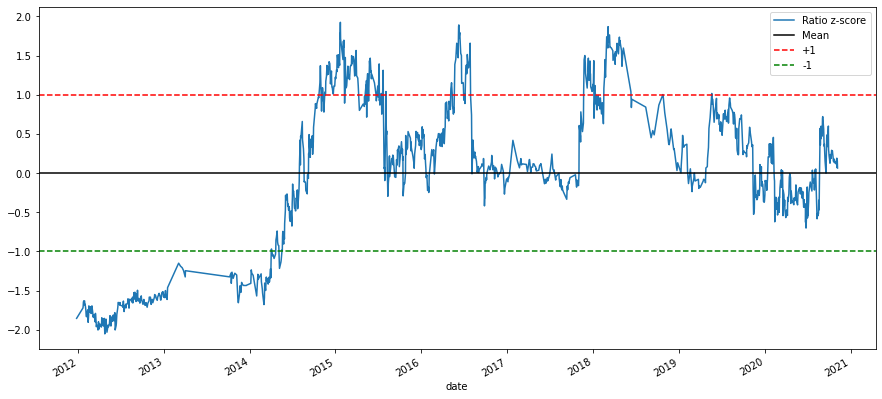

In [ ]:
zscore(ratios).plot(figsize=(15,7))
plt.axhline(zscore(ratios).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Ratio z-score', 'Mean', '+1', '-1'])
plt.show()

In [ ]:

print(len(ratios))
seventy = int(len(ratios) * 0.7)
print(seventy)
train = ratios[:seventy]
test = ratios[seventy:]

1210
847


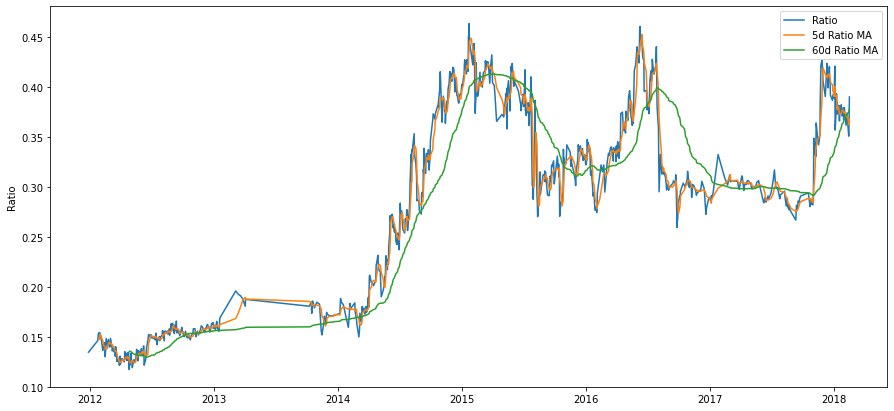

In [ ]:
ratios_mavg5 = train.rolling(window=5,
                               center=False).mean()

ratios_mavg60 = train.rolling(window=60,
                               center=False).mean()

std_60 = train.rolling(window=60,
                        center=False).std()

zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(15,7))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)

plt.legend(['Ratio','5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

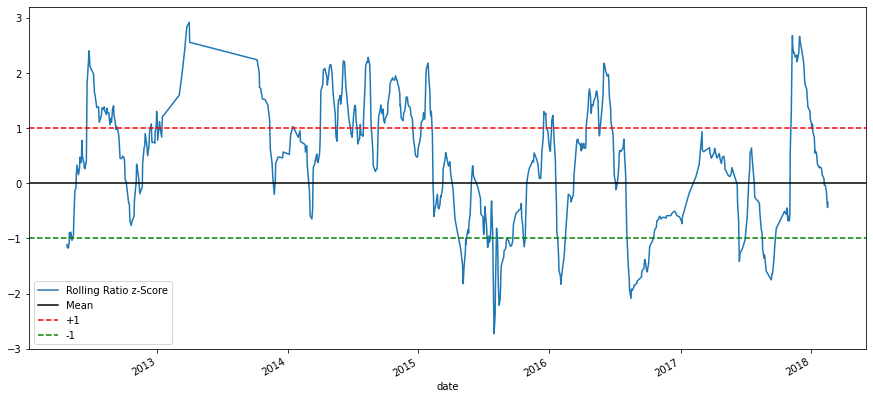

In [ ]:
# Take a rolling 60 day standard deviation
std_60 = train.rolling(window=60,center=False).std()
std_60.name = 'std 60d'

# Compute the z score for each day
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
zscore_60_5.name = 'z-score'

plt.figure(figsize=(15,7))
zscore_60_5.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

In [ ]:
train

date
2011-12-27    0.134409
2012-01-23    0.145919
2012-01-24    0.148139
2012-01-25    0.152666
2012-01-27    0.154005
                ...   
2018-02-09    0.374041
2018-02-12    0.359642
2018-02-14    0.350786
2018-02-15    0.364432
2018-02-16    0.390024
Length: 847, dtype: float64

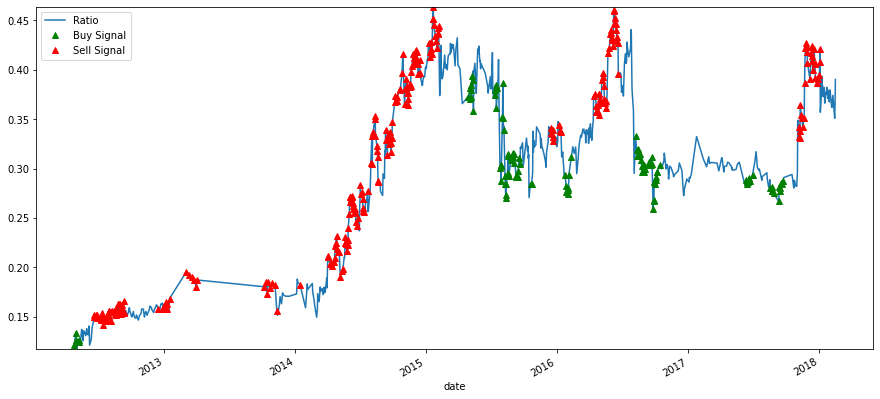

In [ ]:
# Plot the ratios and buy and sell signals from z score
plt.figure(figsize=(15,7))

train[60:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[60:].plot(color='g', linestyle='None', marker='^')
sell[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()


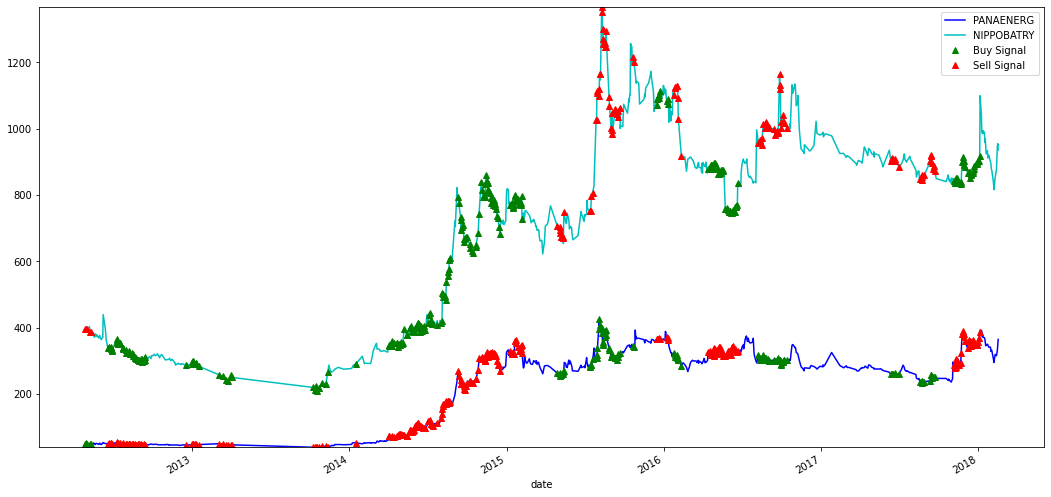

In [ ]:
# Plot the prices and buy and sell signals from z score
plt.figure(figsize=(18,9))
S1 =  Stock1.iloc[:seventy]
S2 =  Stock2.iloc[:seventy]
 
S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()
 
# When buying the ratio, buy S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]
# When selling the ratio, sell S1 and buy S2 
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]
 
buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,min(S1.min(),S2.min()),max(S1.max(),S2.max())))
 
plt.legend([S1.name,S2.name, 'Buy Signal', 'Sell Signal'])
plt.show()

# Simple Strategy:
*  Go "Long" the ratio whenever the z-score is below -1.0
*  Go "Short" the ratio when the z-score is above 1.0
*  Exit positions when the z-score approaches zero


In [ ]:
def trade(S1, S2, window1, window2):
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] > 1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            #print('+'+str(S1[i])+'-' +str(S2[i]) + '*'+str(ratios[i]))
            #print(money)
            #print('greater than 1')
        # Buy long if the z-score is < 1
        elif zscore[i] < -1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
           # print('-'+str(S1[i])+ '+'+str(S2[i]) + '*'+str(ratios[i]))
            #print(money)
            #print('less than 1')
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.5:
            money += countS1*S1[i] + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            #print (money)
            #print('clear positions')
#         print('Z-score: '+ str(zscore[i]), countS1, countS2, S1[i] , S2[i])
    return money
trade(Stock1.iloc[:seventy],Stock2.iloc[:seventy], 5, 254)

14055.377255818337

In [ ]:
# Find the window length 0-254 
# that gives the highest returns using this strategy
length_scores = [trade(Stock1.iloc[:seventy],Stock2.iloc[:seventy], 5, l)for l in range(255)]
best_length = np.argmax(length_scores)
print ('Best window length:', best_length)

Best window length: 254


In [ ]:
trade(Stock1.iloc[seventy:], Stock2.iloc[seventy:], 5, 254)

806.245337372761